# 数据集介绍

数据集有1.66W的数据量，共11列，即包含11个属性字段，分别为：

RANK-总销售额的排名

Name-名字

Platform-发布平台

Year-发行年份

Genre-类型

Publisher-发行人

NA_Sales -北美销售额(百万)

EU_Sales -欧洲销售额(百万)

JP_Sales -日本销售额(百万)

Other_Sales—世界其他地区销售额(百万)

Global_Sales—全球销售总额


In [112]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import  seaborn as s
data = pd.read_csv('vgsales.csv')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签

# 显示前5行数据
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [113]:
# 显示字段属性
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.1+ MB


In [114]:
data.describe(include = 'O').T

,count,unique,top,freq
Name,16598,11493,Need for Speed: Most Wanted,12
Platform,16598,31,DS,2163
Genre,16598,12,Action,3316
Publisher,16540,578,Electronic Arts,1351


从上述数据来看，共有31个游戏发布平台，12种类别和578个发布者

In [115]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


从上述数据来看，三个主要市场中，北美销售额最大，远远高于平均市场；欧洲市场销售额仅次于北美市场；日本市场和其他地区销售额差不多。

## 缺失值处理

In [116]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

有缺失值的属性为‘Year’和‘Publisher’,且缺失值占总数比例较少，不会对结果造成很大影响，可直接删去。

In [117]:
data.dropna(how='any',inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.2+ MB


##    电子游戏市场分析：受欢迎的游戏、类型、发布平台、发行人等；

### 受欢迎的游戏

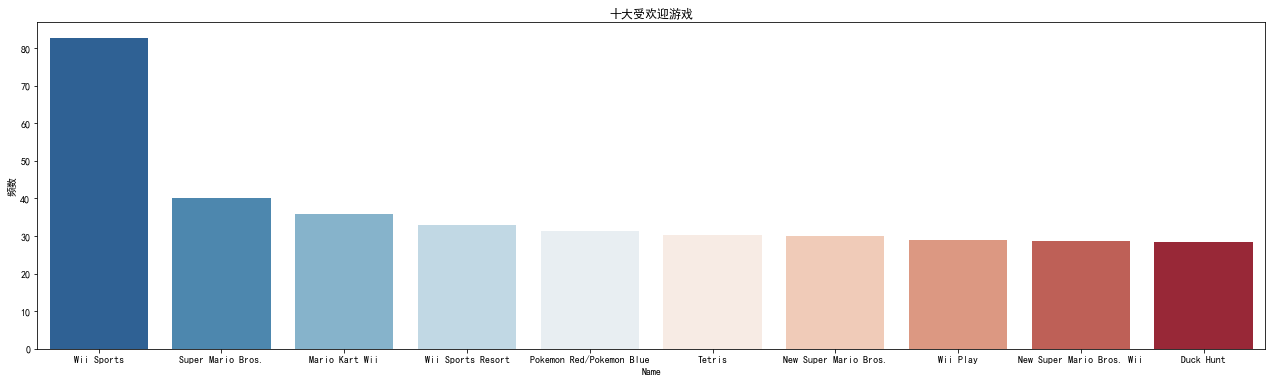

In [111]:
data.sort_values(by='Global_Sales')
df1=data.head(10)
plt.figure(figsize=(22, 6))
s.barplot(x=df1['Name'],  # 指定绘图数据
        y=df1['Global_Sales'],
         palette="RdBu_r") 
plt.ylabel('频数')
plt.title("十大受欢迎游戏")
plt.show()

如图为游戏销售额前十名，如图可见‘Wii Sports’游戏销售额远远高于其他游戏，销售额为8千万左右其他游戏销售在4千万左右。
由可视化分析可知，统计年份期间，全球十大最受欢迎的游戏:
1. Wii Sports
2. Super Mario Bros.
3. Mario Kart Wii
4. Wii Sports Resort
5. Pokemon Red/Pokemon Blue
6. Tetris
7. New Super Mario Bros.
8. Wii Play
9. New Super Mario Bros. Wii
10. Duck Hunt

### 受欢迎游戏类型

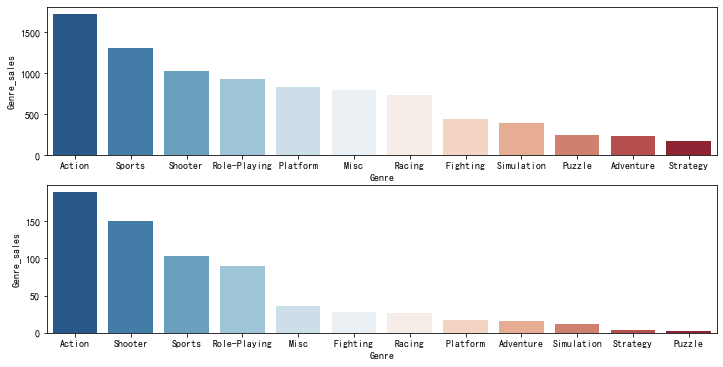

In [118]:
ge1=pd.pivot_table(data,index='Year',columns='Genre',values='Global_Sales',aggfunc=np.sum).sum().sort_values(ascending=False)
ge1=pd.DataFrame(data=ge1,columns={'Genre_sales'})
ge2=pd.pivot_table(data,index='Year',columns='Genre',values='Global_Sales',aggfunc=np.sum).iloc[-5:,:].sum().sort_values(ascending=False)
ge2=pd.DataFrame(data=ge2,columns={'Genre_sales'})
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(12,6))
s.barplot(x=ge1.index,y='Genre_sales',data=ge1,ax=ax1,palette="RdBu_r")
s.barplot(x=ge2.index,y='Genre_sales',data=ge2,ax=ax2,palette="RdBu_r")

由上图可见，最受玩家欢迎的游戏是动作类,在近5年，射击类的游戏销量超过了运动类的游戏。
统计年份中，最受欢迎的五大游戏类型:
1. Action 
2. Sports
3. Shooter
4. Role-Playing
5. Platform

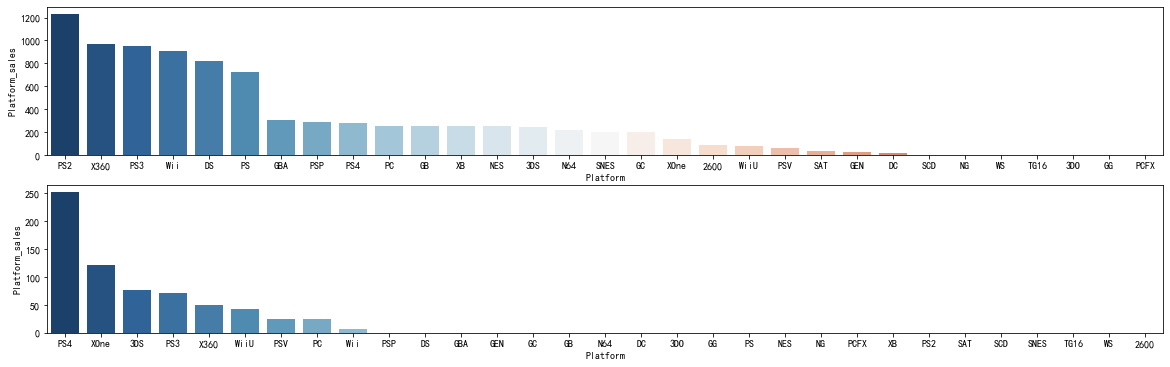

In [119]:
pf1=pd.pivot_table(data,index='Year',columns='Platform',values='Global_Sales',aggfunc=np.sum).sum().sort_values(ascending=False)
pf1=pd.DataFrame(data=pf1,columns={'Platform_sales'})
pf2=pd.pivot_table(data,index='Year',columns='Platform',values='Global_Sales',aggfunc=np.sum).iloc[-5:,:].sum().sort_values(ascending=False)
pf2=pd.DataFrame(data=pf2,columns={'Platform_sales'})
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(20,6))
s.barplot(x=pf1.index,y='Platform_sales',data=pf1,ax=ax1,palette="RdBu_r")
s.barplot(x=pf2.index,y='Platform_sales',data=pf2,ax=ax2,palette="RdBu_r")

如上图可见，PS2为总体销量最高的游戏平台，但在最近5年，被PS4所代替，其原因可能是由于游戏设备的更新换代，PS2逐渐被PS3、PS4取代。
统计年份中，全球最受欢迎的十大游戏发布平台:
1. PS2
2. X360
3. PS3
4. Wii
5. DS
6. PS
7. GBA
8. PSP
9. PS4
10. PC

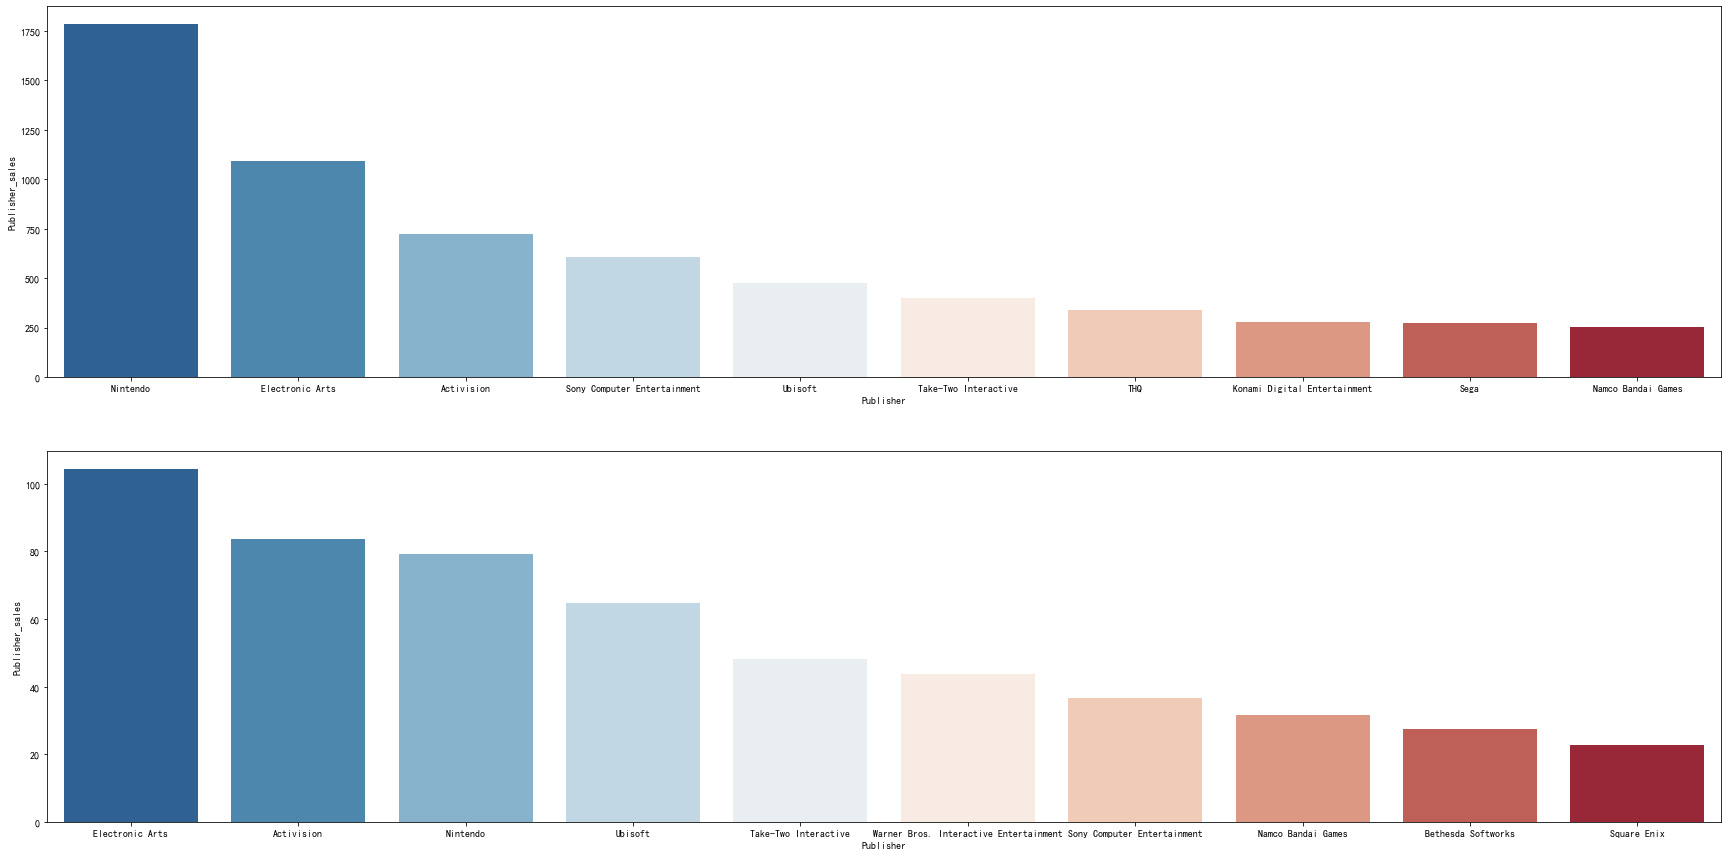

In [122]:
pl1=pd.pivot_table(data,index='Year',columns='Publisher',values='Global_Sales',aggfunc=np.sum).iloc[:,:].sum().sort_values(ascending=False)
pl1=pd.DataFrame(data=pl1,columns={'Publisher_sales'}).head(10)
pl2=pd.pivot_table(data,index='Year',columns='Publisher',values='Global_Sales',aggfunc=np.sum).iloc[-5:,:].sum().sort_values(ascending=False)
pl2=pd.DataFrame(data=pl2,columns={'Publisher_sales'}).head(10)
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(30,15))
s.barplot(x=pl1.index,y='Publisher_sales',data=pl1,ax=ax1,palette="RdBu_r")
s.barplot(x=pl2.index,y='Publisher_sales',data=pl2,ax=ax2,palette="RdBu_r")

从上图可见，Nintendo和Electronic Arts发布的游戏是获得销量最高的，而在近五年Electronic Arts和Activison逐渐超过Nintendo成为近五年发布游戏是获得销量最高的。
统计年份期间，全球最受欢迎的五大游戏发行商:
1. Nintendo
2. Electronic Arts
3. Activision
4. Sony Computer Entertainment
5. Ubisoft

##  预测每年电子游戏销售额

首先将标称属性转为数值属性


In [141]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LinearRegression

label_encoder = preprocessing.LabelEncoder()
data['Platform'] = label_encoder.fit_transform(data['Platform'].astype('str'))
data['Genre'] = label_encoder.fit_transform(data['Genre'].astype('str'))
data['Publisher'] = label_encoder.fit_transform(data['Publisher'].astype('str'))
data.head(10)

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,19,2006.0,2,289,41.49,29.02,3.77,8.46,82.74
1,3,1985.0,6,289,29.08,3.58,6.81,0.77,40.24
2,19,2008.0,8,289,15.85,12.88,3.79,3.31,35.82
3,19,2009.0,2,289,15.75,11.01,3.28,2.96,33.00
4,26,1996.0,9,289,11.27,8.89,10.22,1.00,31.37
5,26,1989.0,7,289,23.20,2.26,4.22,0.58,30.26
6,25,2006.0,6,289,11.38,9.23,6.50,2.90,30.01
7,19,2006.0,5,289,14.03,9.20,2.93,2.85,29.02
8,19,2009.0,6,289,14.59,7.06,4.70,2.26,28.62
9,3,1984.0,10,289,26.93,0.63,0.28,0.47,28.31


              Platform      Year     Genre  Publisher  NA_Sales  EU_Sales  \
Platform      1.000000  0.158263  0.017721   0.020425  0.006592 -0.033945   
Year          0.158263  1.000000 -0.091441   0.024538 -0.091285  0.006108   
Genre         0.017721 -0.091441  1.000000   0.021830  0.038507  0.030604   
Publisher     0.020425  0.024538  0.021830   1.000000 -0.026471 -0.021190   
NA_Sales      0.006592 -0.091285  0.038507  -0.026471  1.000000  0.768923   
EU_Sales     -0.033945  0.006108  0.030604  -0.021190  0.768923  1.000000   
JP_Sales     -0.024936 -0.169387  0.073299   0.027540  0.451283  0.436379   
Other_Sales  -0.064247  0.041128  0.013151  -0.015222  0.634518  0.726256   
Global_Sales -0.020225 -0.074647  0.046341  -0.017148  0.941269  0.903264   

              JP_Sales  Other_Sales  Global_Sales  
Platform     -0.024936    -0.064247     -0.020225  
Year         -0.169387     0.041128     -0.074647  
Genre         0.073299     0.013151      0.046341  
Publisher     0.02754

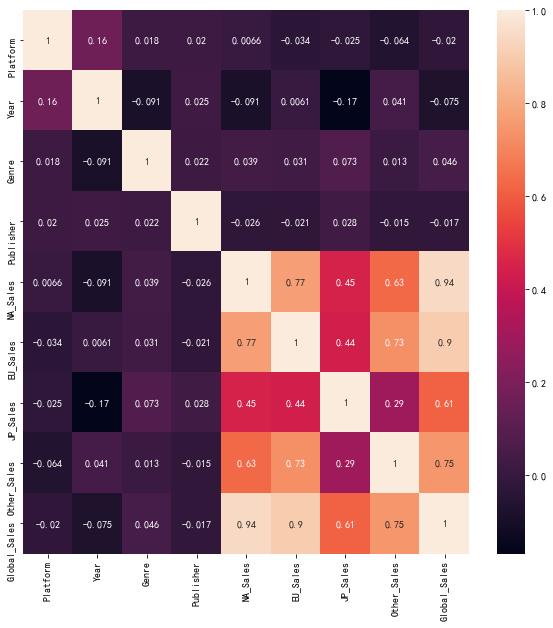

In [155]:
corr = data.corr()
print(corr)
plt.figure(figsize=(10, 10))
ax = s.heatmap(corr, annot=True)

以游戏最终全球销量作为预测对象，平台、年份、类型和发行人作为输入，构建模型，按2：8划分测试集和训练集，利用模型进行预测和评价。

### 利用Logistic预测游戏销量

In [143]:
label= ['Platform', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales']
X = data[label]
y = data['Global_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [144]:
print('平均绝对误差:', metrics.mean_absolute_error(y_test, y_pred).round(3))
print('均方误差:', metrics.mean_squared_error(y_test, y_pred).round(3))
print('均方根误差:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(3))
print('R2:', r2_score(y_test, y_pred).round(3))

平均绝对误差: 0.405
均方误差: 1.164
均方根误差: 1.079
R2: 0.434


## 可视化应用：
### 各个市场每年电子游戏销售额走势

Text(0.5, 1.0, '市场发展趋势')

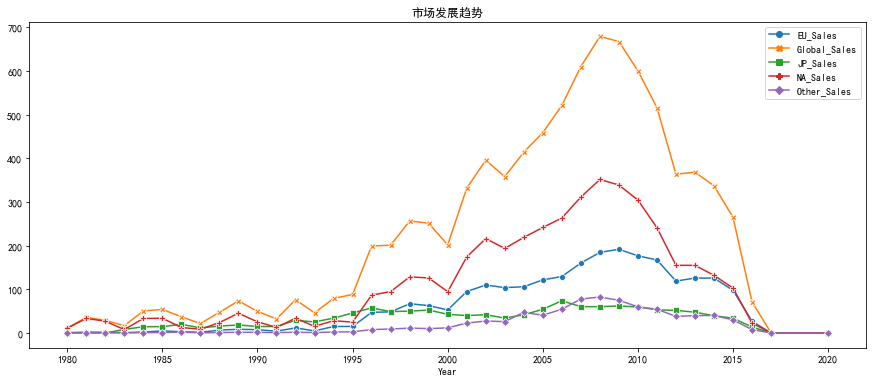

In [120]:
Mlabel=['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
mk=pd.pivot_table(data,index='Year',values=Mlabel,aggfunc=np.sum)
fig=plt.figure(figsize=(15,6))
s.lineplot(data=mk,hue="event", style="event", markers=True, dashes=False,)
plt.title('市场发展趋势')

由上图看出，从1996年开始，游戏销售进入快速增长的阶段，并在2007年达到巅峰；随后由于其他娱乐产业的发展，对电子游戏行业产生了冲击，以至于在2010年与2015年产生了断崖式的下跌，近年来也始终以颓势下跌。
### 五大发行人每年电子游戏销售额走势

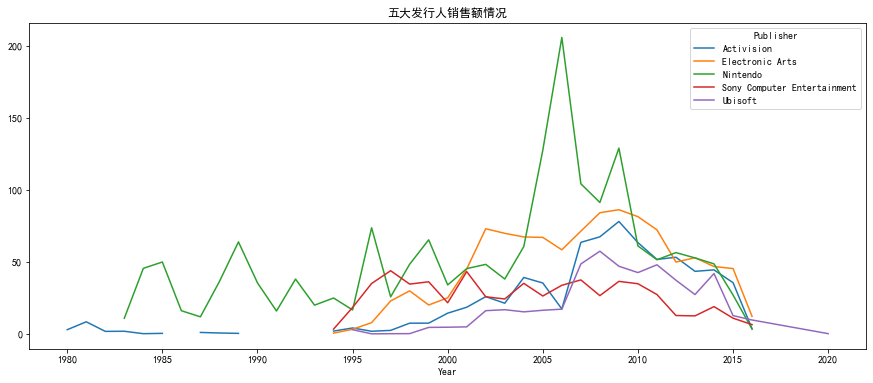

In [121]:
Plabel=['Nintendo','Electronic Arts','Activision','Sony Computer Entertainment','Ubisoft']
Pb=data[data['Publisher'].isin(Plabel)]
Pb=pd.pivot_table(data=Pb,index='Year',columns='Publisher',values='Global_Sales',aggfunc=np.sum)
Pb.plot(title='五大发行人销售额情况',figsize=(15,6))

由图可见，2005年后Nintendo销售额达到了顶峰，在2010年之后各个发行公司销售额都逐渐下降。